# 2023 Analysis by Ward

In [2]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import pandas as pd
import contextily as cx
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

import seaborn as sns

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
gdf_full = get_data(2023, geo=True)

Breakdown by Outlier Condition:
	Outlier Rents: 5461 (30%)
	Outlier Increase vs Base: 608 ( 3%)
	Outlier Increase vs Previous: 328 ( 2%)
	Overall: 5905 (33%)

Breakdown by Subset:
	5905 outliers (33%)
	12081 non-outliers (67%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


For this analysis, we will drop parcels that cannot be correctly mapped to a ward.

In [4]:
gdf = gdf_full.dropna(subset=["WARD"])
print("Number of parcels with Ward data: ", len(gdf))
print("Number of parcels without Ward data: ", len(gdf_full) - len(gdf))

Number of parcels with Ward data:  17818
Number of parcels without Ward data:  168


In [5]:
wards = gpd.read_file("../../municipal-street-list/wards.geojson").to_crs(3857)
wards["NAME"] = wards["NAME"].astype(float)

In [6]:
quantiles = gdf[~gdf["outlier"]][numerical_columns].quantile([.05, .95])

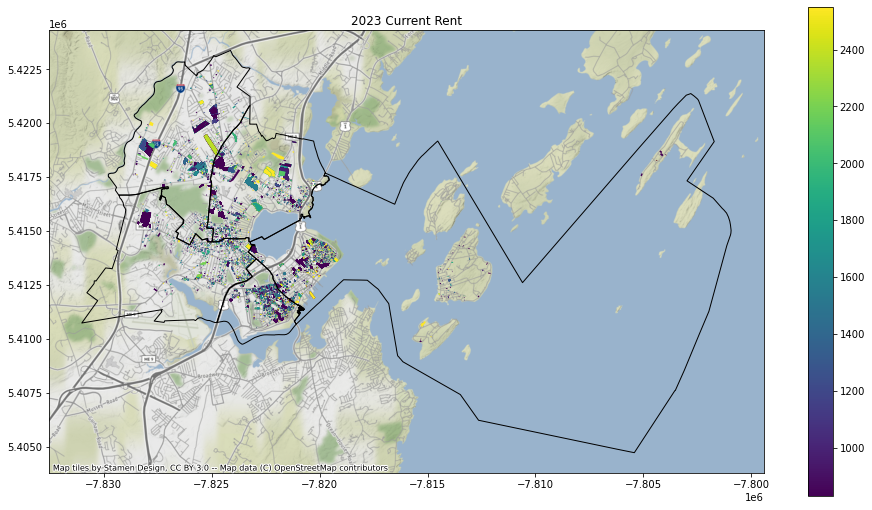

In [7]:
ax = gdf.plot("CurrentRent1", figsize=(16,9), legend=True, vmin=quantiles["CurrentRent1"].iloc[0], vmax=quantiles["CurrentRent1"].iloc[1])
ax.set_title("2023 Current Rent")
wards.plot(ax=ax, facecolor='none', edgecolor='k')
cx.add_basemap(ax)

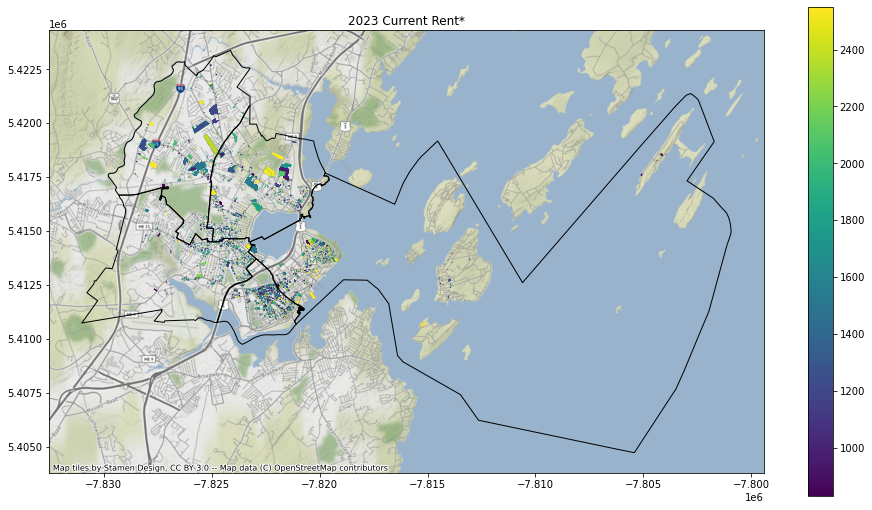

In [8]:
ax = gdf[~gdf["outlier"]].plot("CurrentRent1", figsize=(16,9), legend=True, vmin=quantiles["CurrentRent1"].iloc[0], vmax=quantiles["CurrentRent1"].iloc[1])
ax.set_title("2023 Current Rent*")
wards.plot(ax=ax, facecolor='none', edgecolor='k')
cx.add_basemap(ax)

## Ward Statistics

In [9]:
gdf_median = wards.merge(gdf.groupby("WARD").median(), left_on="NAME", right_index=True)
gdf_sum = wards.merge(gdf.groupby("WARD").sum(), left_on="NAME", right_index=True)

## Maps (Choropleths)

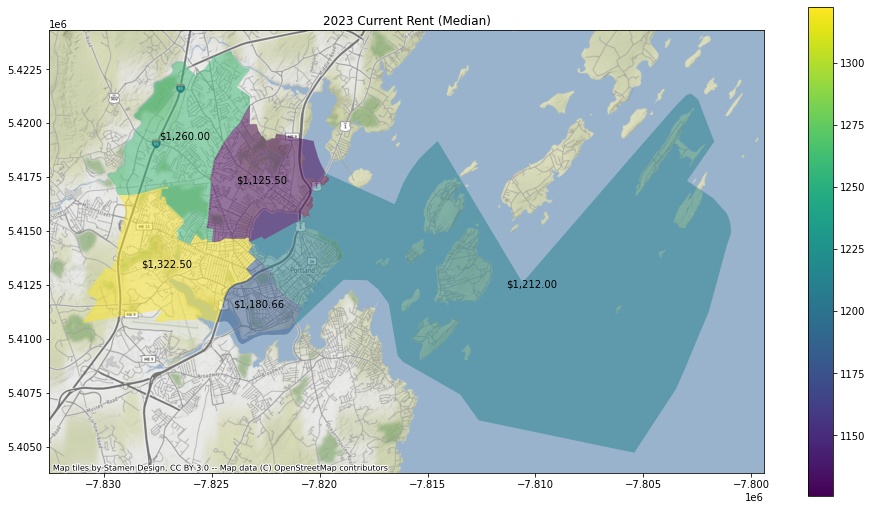

In [10]:
ax = gdf_median.plot("CurrentRent1", figsize=(16,9), legend=True, alpha=0.5)
gdf_median.apply(lambda x: ax.annotate(text=f"${x['CurrentRent1']:,.2f}", xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Current Rent (Median)")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Current Rents by Ward, All Registered Units*')

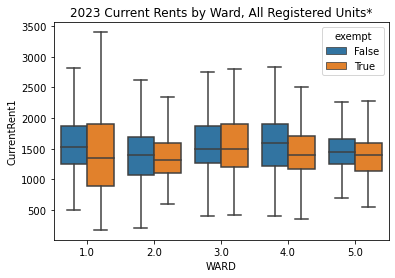

In [11]:
ax = sns.boxplot(
    data=gdf[~gdf["outlier"]].sort_values("CurrentRent1"),
    x="WARD",
    y="CurrentRent1",
    hue="exempt",
    showfliers=False,
    )
ax.set_title("2023 Current Rents by Ward, All Registered Units*")

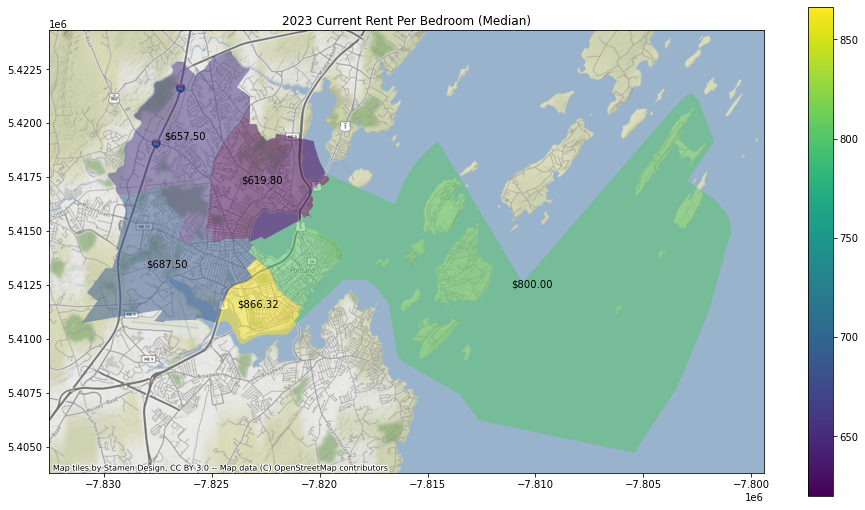

In [12]:
ax = gdf_median.plot("Rent_per_BedRms", figsize=(16,9), legend=True, alpha=0.5)
gdf_median.apply(lambda x: ax.annotate(text=f"${x['Rent_per_BedRms']:,.2f}", xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Current Rent Per Bedroom (Median)")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Current Rents per Bedroom by Ward, All Registered Units*')

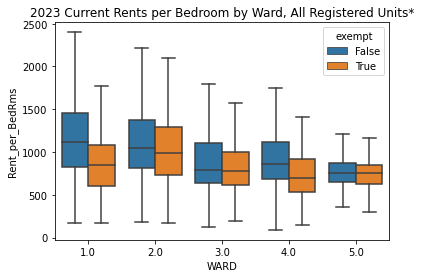

In [13]:
ax = sns.boxplot(
    data=gdf[~gdf["outlier"]].sort_values("Rent_per_BedRms"),
    x="WARD",
    y="Rent_per_BedRms",
    hue="exempt",
    showfliers=False,
    )
ax.set_title("2023 Current Rents per Bedroom by Ward, All Registered Units*")

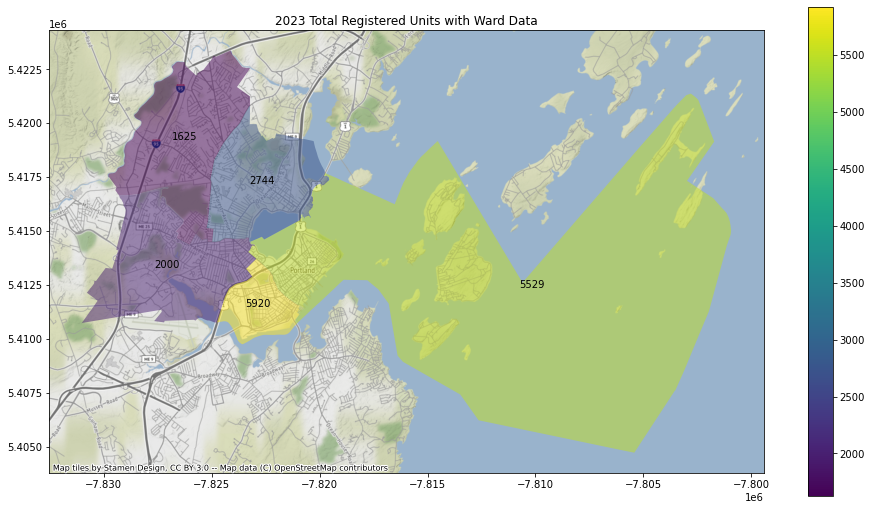

In [14]:
ax = gdf_sum.plot("Count", figsize=(16,9), legend=True, alpha=0.5)
gdf_sum.apply(lambda x: ax.annotate(text=x['Count'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Total Registered Units with Ward Data")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Total Registered Units with Ward Data*')

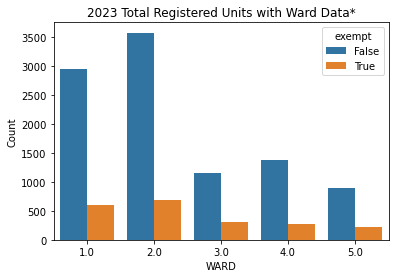

In [15]:
ax = sns.barplot(
    data=gdf[~gdf["outlier"]].sort_values("WARD"),
    x="WARD",
    y="Count",
    hue="exempt",
    estimator=np.sum
    )
ax.set_title("2023 Total Registered Units with Ward Data*")

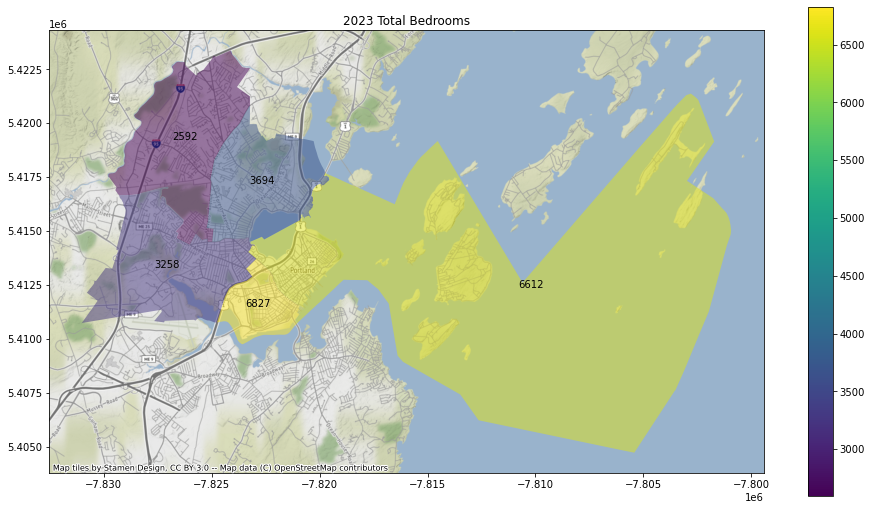

In [16]:
ax = gdf_sum.plot("nbrBedRms1", figsize=(16,9), legend=True, alpha=0.5)
gdf_sum.apply(lambda x: ax.annotate(text=x['nbrBedRms1'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Total Bedrooms")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Total Bedrooms with Ward Data*')

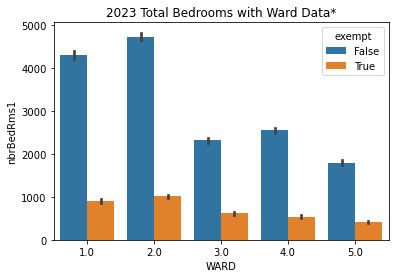

In [17]:
ax = sns.barplot(
    data=gdf[~gdf["outlier"]].sort_values("WARD"),
    x="WARD",
    y="nbrBedRms1",
    hue="exempt",
    estimator=np.sum
    )
ax.set_title("2023 Total Bedrooms with Ward Data*")

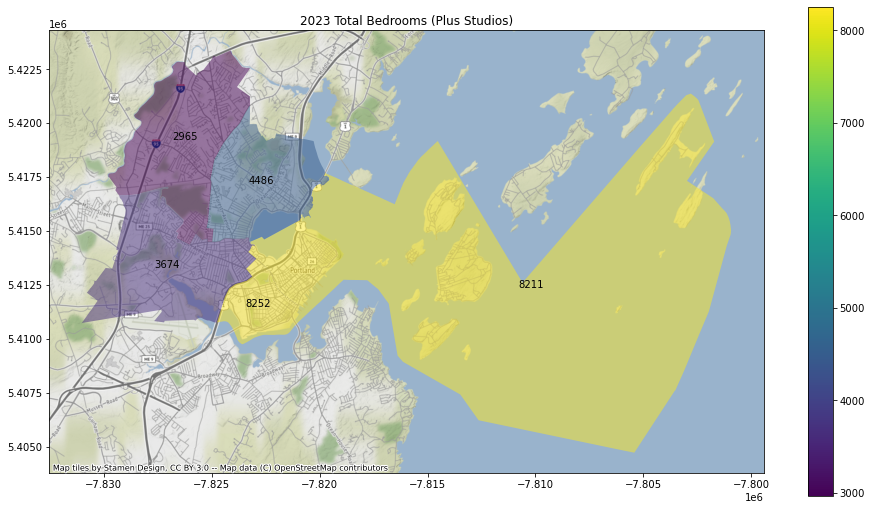

In [18]:
ax = gdf_sum.plot("nbrBedRms_studio", figsize=(16,9), legend=True, alpha=0.5)
gdf_sum.apply(lambda x: ax.annotate(text=x['nbrBedRms_studio'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Total Bedrooms (Plus Studios)")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Total Bedrooms with Ward Data (Plus Studios)*')

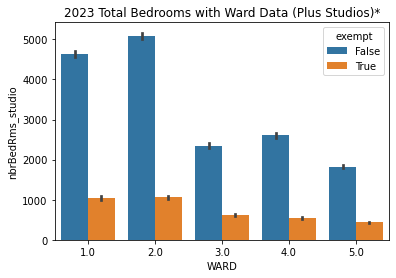

In [19]:
ax = sns.barplot(
    data=gdf[~gdf["outlier"]].sort_values("WARD"),
    x="WARD",
    y="nbrBedRms_studio",
    hue="exempt",
    estimator=np.sum
    )
ax.set_title("2023 Total Bedrooms with Ward Data (Plus Studios)*")

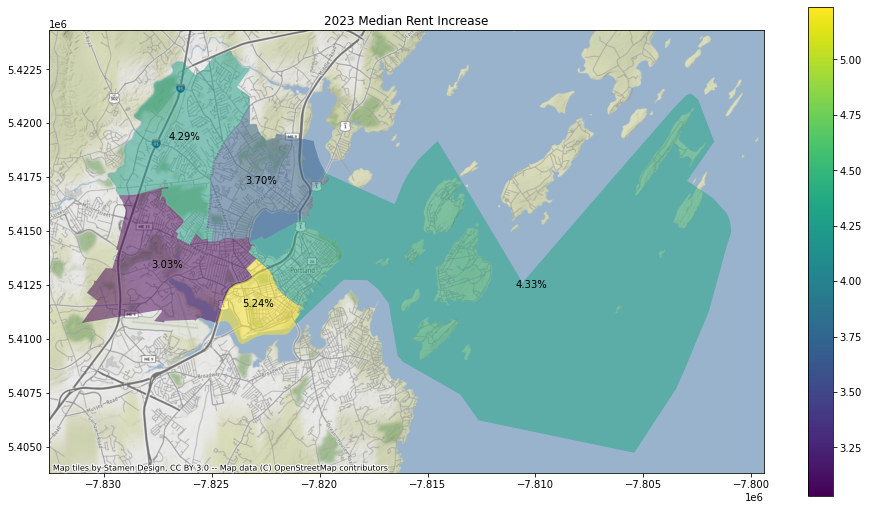

In [20]:
ax = gdf_median.plot("Rent_Inc_percent", figsize=(16,9), legend=True, alpha=0.5)
gdf_median.apply(lambda x: ax.annotate(text=f"{x['Rent_Inc_percent']:.2f}%", xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Median Rent Increase")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Rent Increases by Ward, All Registered Units*')

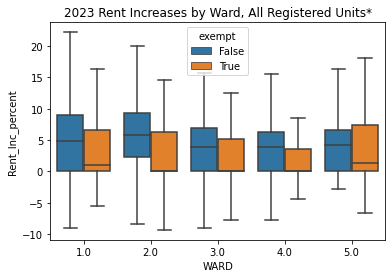

In [21]:
ax = sns.boxplot(
    data=gdf[~gdf["outlier"]].sort_values("WARD"),
    x="WARD",
    y="Rent_Inc_percent",
    hue="exempt",
    showfliers=False
    )
ax.set_title("2023 Rent Increases by Ward, All Registered Units*")

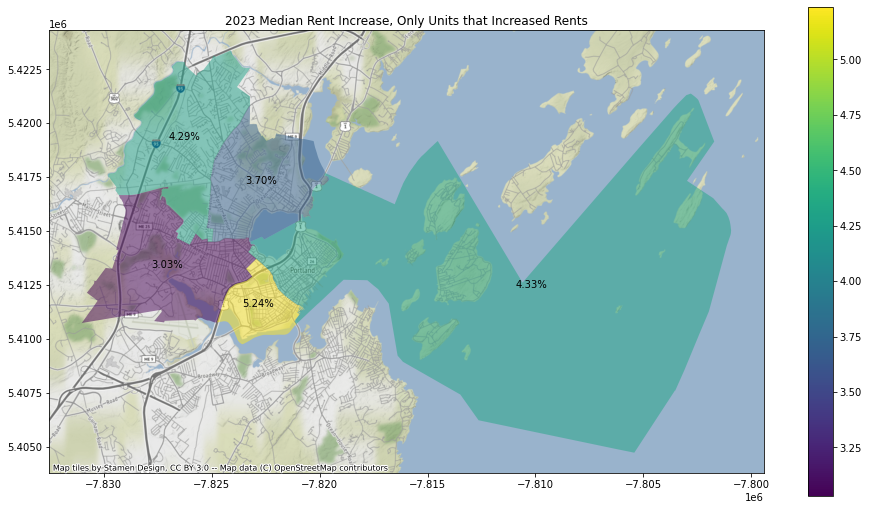

In [22]:
ax = gdf_median.plot("Rent_Inc_percent", figsize=(16,9), legend=True, alpha=0.5)
gdf_median.apply(lambda x: ax.annotate(text=f"{x['Rent_Inc_percent']:.2f}%", xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
ax.set_title("2023 Median Rent Increase, Only Units that Increased Rents")
cx.add_basemap(ax)

Text(0.5, 1.0, '2023 Rent Increases by Ward, Only Units that Increased Rents*')

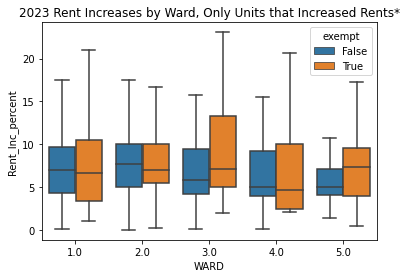

In [23]:
ax = sns.boxplot(
    data=gdf[~gdf["outlier"] & (gdf["Rent_Inc"] > 0)].sort_values("WARD"),
    x="WARD",
    y="Rent_Inc_percent",
    hue="exempt",
    showfliers=False
    )
ax.set_title("2023 Rent Increases by Ward, Only Units that Increased Rents*")